In [38]:
import pandas as pd

In [46]:
data = pd.read_csv("C:/Users/Lean/Desktop/Libro.csv", on_bad_lines='skip',sep = ";")
data.head()

,vcp,vminsplit,vminbucket,vmaxdepth,Ganancia
0,1.0,20,666666667,2,17574000
1,1.0,20,666666667,9,17574000
2,1.0,20,666666667,7,17574000
3,1.0,20,666666667,15,17574000
4,1.0,200,666666667,2,0


In [47]:
data.shape

(1181, 5)

In [48]:
colnames = data.columns.values.tolist()
predictors = colnames[:4]
target = colnames[4]
X = data[predictors]
Y = data[target]

### Ahora construimos el árbol de regresión

In [49]:
from sklearn.tree import DecisionTreeRegressor

In [62]:
regtree = DecisionTreeRegressor(min_samples_split= 100, min_samples_leaf=10,max_depth=5, random_state=0)

In [63]:
regtree.fit(X,Y)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=10, min_samples_split=100,
                      random_state=0)

In [64]:
preds = regtree.predict(data[predictors])

In [65]:
data["preds"] = preds

### Visualización del árbol de decisión

In [66]:
from sklearn.tree import export_graphviz

In [67]:
with open("C:/Users/Lean/Desktop/boston_rtree.dot", "w") as dotfile:
    export_graphviz(regtree, out_file=dotfile, feature_names=predictors)
    dotfile.close()

In [68]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'
from graphviz import Source

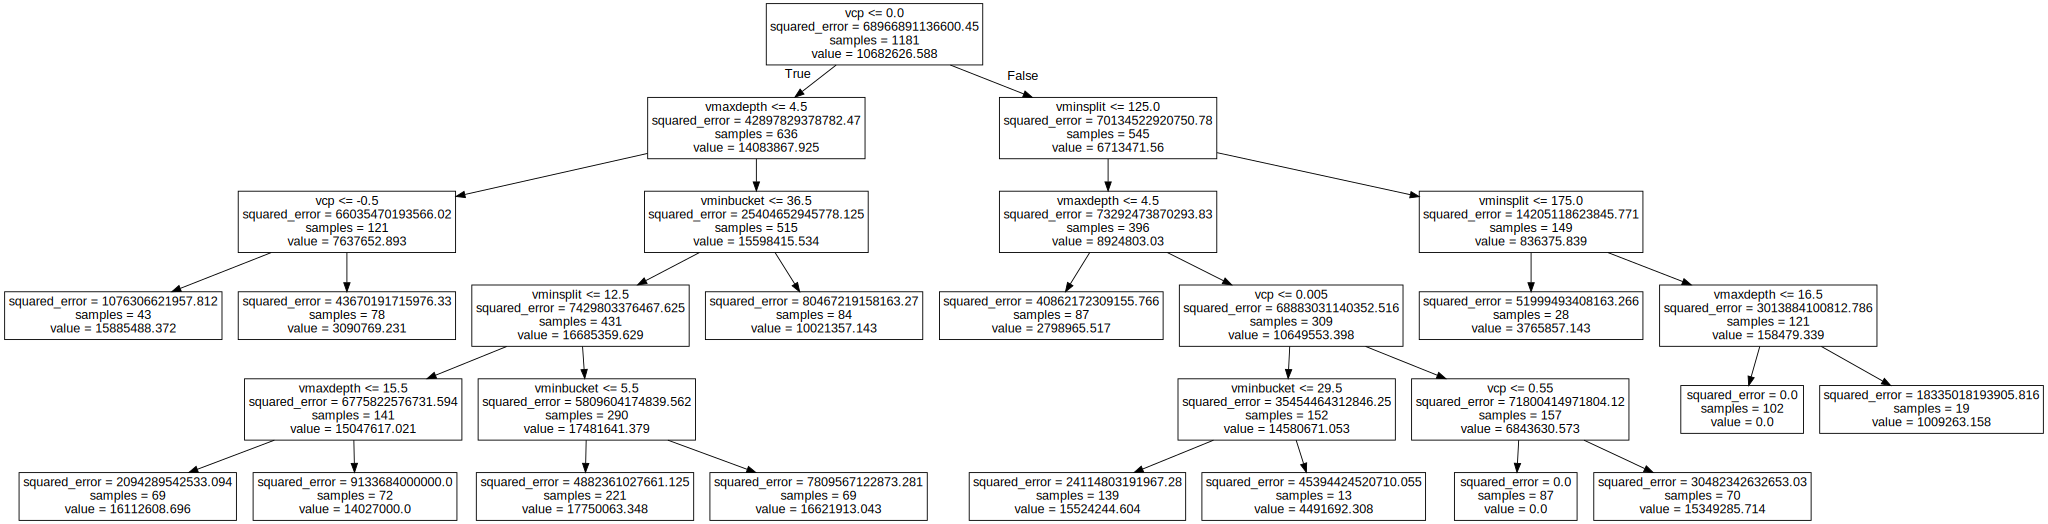

In [69]:
file = open("C:/Users/Lean/Desktop/boston_rtree.dot", "r")
text = file.read()
Source(text)

Vemos que la mayor ganancia se produce cuando VCP >= -0.5 y vmaxdepth <= 4.5


### Usaremos una validación cruzada para validar la eficacia del árbol

In [70]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np

Creamos 10 grupos para evaluar su eficacia

In [71]:
cv = KFold(n_splits= 10, shuffle= True, random_state=1)

Creamos un indice de validación cruzada

In [72]:
scores = cross_val_score(regtree, X, Y, scoring="neg_mean_squared_error", cv = cv, n_jobs=1)
score = np.mean(scores)
print(scores)
print(score)

[-2.42553583e+13 -2.69962707e+13 -1.72824378e+13 -1.67489272e+13
 -2.51874393e+13 -2.09386310e+13 -1.62641549e+13 -1.87627081e+13
 -2.34422991e+13 -1.83971854e+13]
-20827541172547.36


### Buscamos cuales son las variables más importantes

In [73]:
list(zip(predictors,regtree.feature_importances_))

[('vcp', 0.5967512566854822),
 ('vminsplit', 0.13838442317291733),
 ('vminbucket', 0.08078751400950585),
 ('vmaxdepth', 0.18407680613209457)]

Vemos que la variable más importante es vcp con el 59% de la información y en segundo lugar tenemos a vmaxdepth con el 18%.